In [3]:
import mdps
import algos
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [5]:
def loadall(filename):
    with open(filename, "rb") as f:
        while True:
            try:
                yield pickle.load(f)
            except EOFError:
                break

In [6]:
def weighted_norm(A,w):
    return np.sqrt((w*A*A).sum())

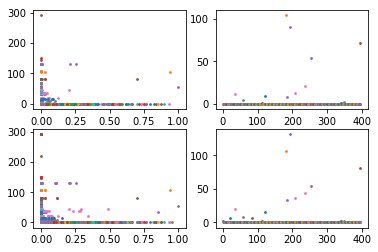

In [7]:
data = loadall("va_counter_examples_nrsu.pickle")
msize = 3
plt.figure(1)
plt.subplot(221)
v_plt = plt.gca()
plt.subplot(222)
v_norm_plt = plt.gca()
plt.subplot(223)
q_plt = plt.gca()
plt.subplot(224)
q_norm_plt = plt.gca()
# plt.subplot(325)
# v_log_plt = plt.gca()
# plt.subplot(326)
# q_log_plt = plt.gca()
# v_log_plt.set_yscale('log')
# q_log_plt.set_yscale('log')
# v_log_plt.set_xscale('log')
# q_log_plt.set_xscale('log')
idx_d = 0
for d in data:
    q_y = np.abs(d['Q'] - d['Q_via_mdp'])
    q_x = d['B']
    idx = d['Q'].argmax(axis=0)
    v_y = np.abs(d['Q'].max(axis=0) - d['Q_via_mdp'].max(axis=0))
    v_x = []
    s = 0
    for a in idx:
        v_x = np.hstack((v_x, d['B'][a][s])) if np.size(v_x) else d['B'][a][s]
        s += 1
    v_plt.scatter(v_x, v_y, s=msize)
    # v_log_plt.scatter(v_x, v_y, s=2)
    q_plt.scatter(q_x, q_y, s=msize)
    # q_log_plt.scatter(q_x, q_y, s=2)
    q_norm_plt.scatter(idx_d, weighted_norm(q_y, q_x), s=msize)
    v_norm_plt.scatter(idx_d, weighted_norm(v_y, v_x), s=msize)
    idx_d += 1
# h_x = np.linspace(0,1,100)
# h_y = f(h_x)
# v_plt.plot(h_x, h_y)
plt.show()
